## Detection using DecisionTreeClassifier (Iris Flower)

#### Importing Necessary Library

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#### Loading and Reading the data

In [145]:
df= pd.read_csv('Iris.csv')
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [146]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Data Checking or Cleaning

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [148]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [149]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [150]:
print(df.Species.nunique())
print(df.Species.value_counts())

3
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


#### Data Visualisation

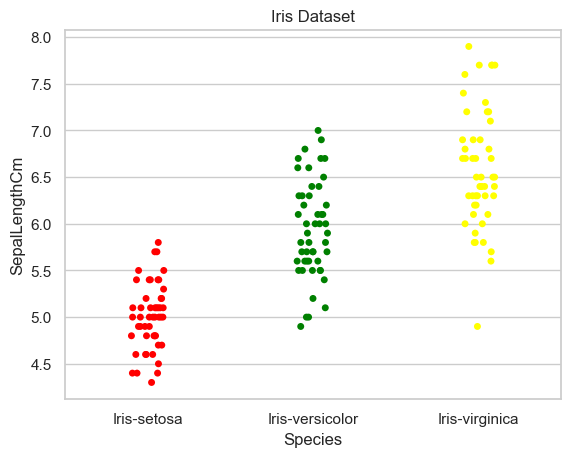

In [151]:
sns.set(style = 'whitegrid')
ax = sns.stripplot(x ='Species',y =	'SepalLengthCm' ,data = df, palette=['red', 'green', 'yellow'])
plt.title('Iris Dataset')
plt.show()


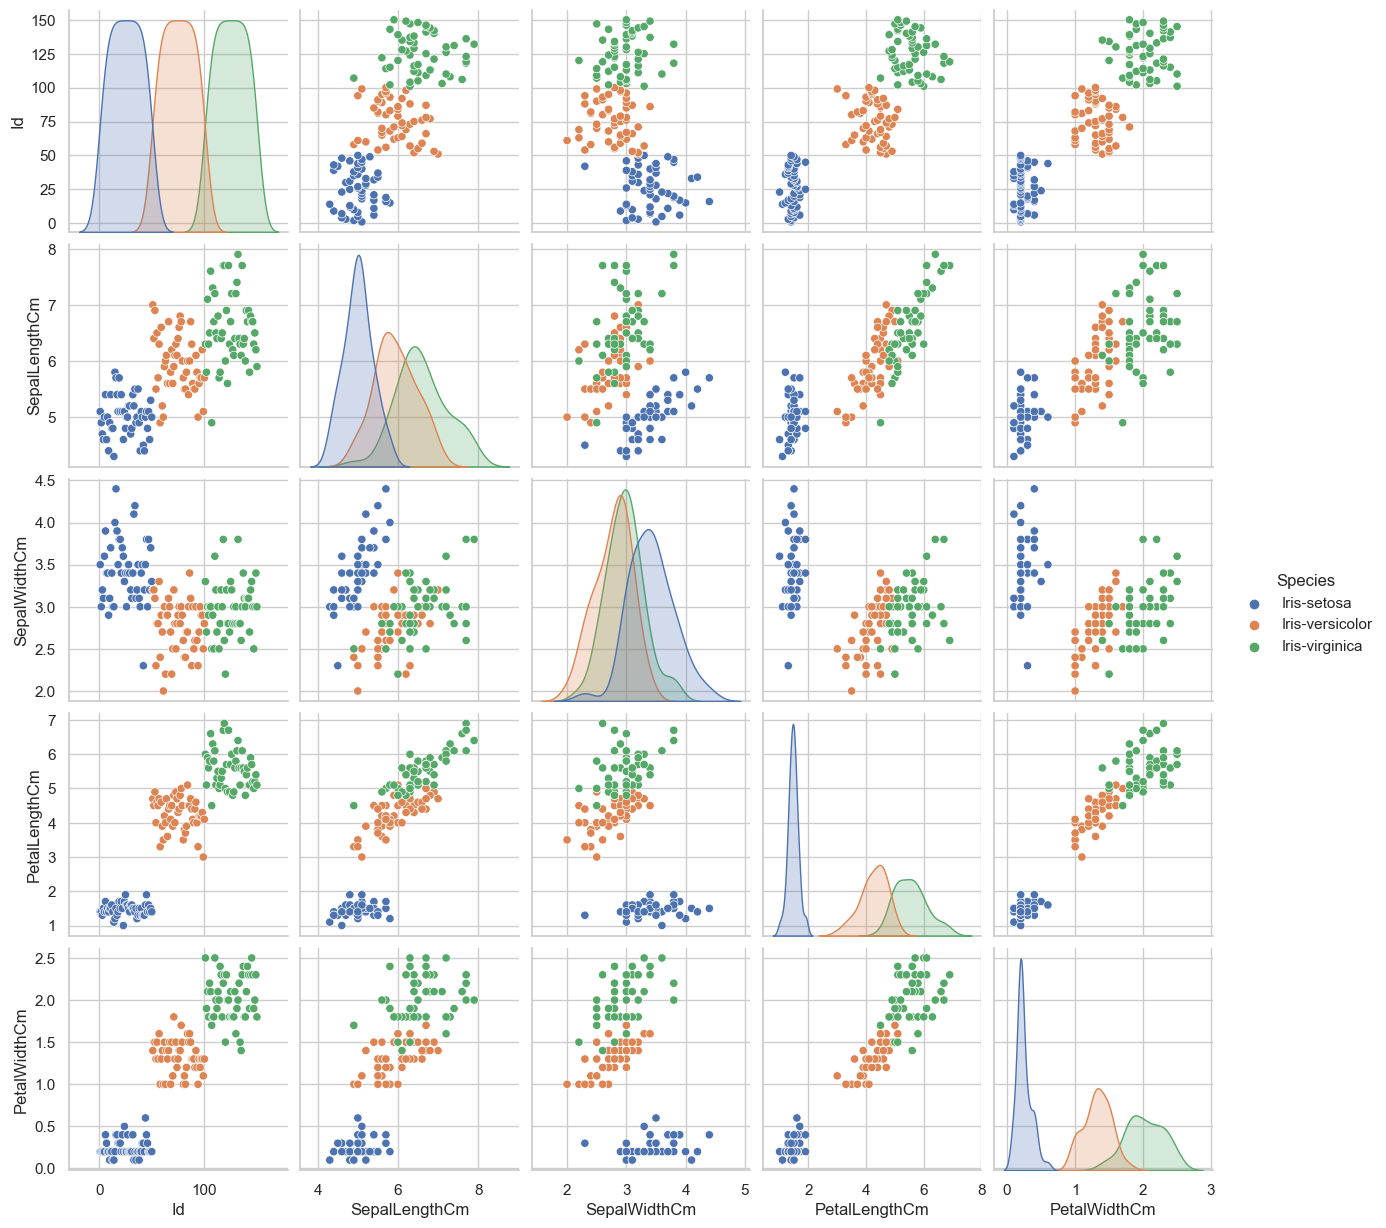

In [152]:
sns.pairplot(hue='Species', data=df)

#### Correlation Matrix

In [153]:
irisC= df.drop(['Species'], axis=1)
irisC

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [154]:
irisC.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

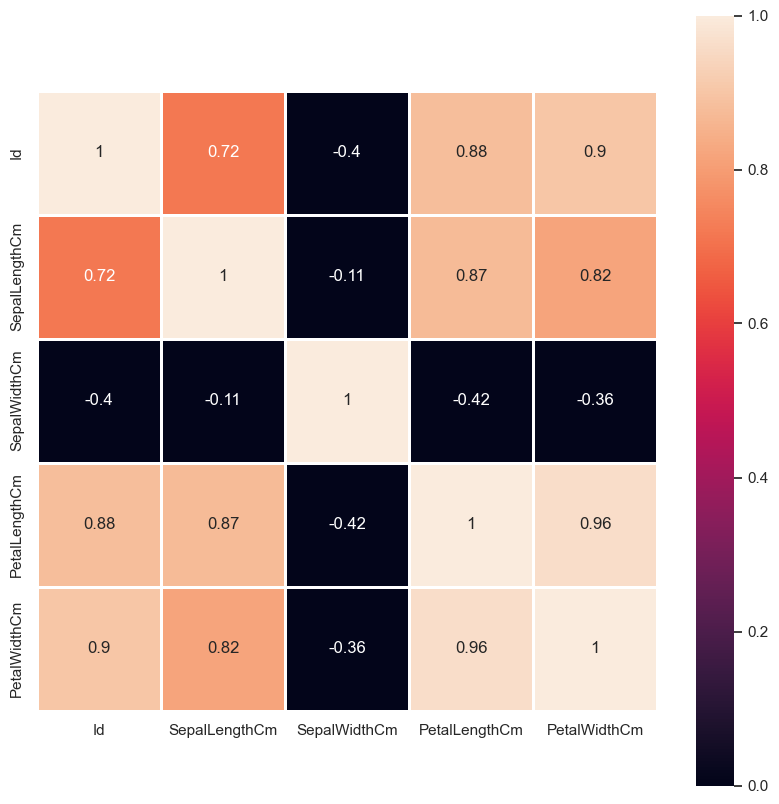

In [155]:
dd= irisC.corr()
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(dd, vmin=0, vmax=1, square=True, annot=True, linewidths=1)

#### Data Preprocessing

In [156]:
target=df['Species']
dfd=df.copy()
dfd=dfd.drop('Species', axis=1)
dfd.shape

(150, 5)

In [157]:
X= df.iloc[:, [0,1,2,3,]].values

le= LabelEncoder()  # to convert the values for the y so that we can train the model 
df['Species']= le.fit_transform(df['Species'])

Y= df['Species'].values
df.shape

(150, 6)

#### Training the model

In [166]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=0.33)
mod= DecisionTreeClassifier()
mod.fit(Xtrain, Ytrain)
print("Model is Trained")

Model is Trained


In [159]:
print(Xtrain.shape)
print(Xtest.shape)
print(len(Xtrain))
print(len(Xtest))

(115, 4)
(35, 4)
115
35


In [167]:
mod.predict(Xtest)

array([1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       2, 0, 2, 0, 1, 0])

#### Classification report and confusion matrix

In [168]:
ypred =mod.predict(Xtest)
print("Classification Report\n: ", classification_report(Ytest, ypred))
 


Classification Report
:                precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.87      1.00      0.93        13
           2       1.00      1.00      1.00        17

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



In [169]:
acc = sm.accuracy_score(Ytest,ypred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 96.0%


In [170]:
#confusion matrix
cm=confusion_matrix(Ytest,ypred)
cm

array([[18,  2,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]], dtype=int64)

#### Visualisation of Trained Model

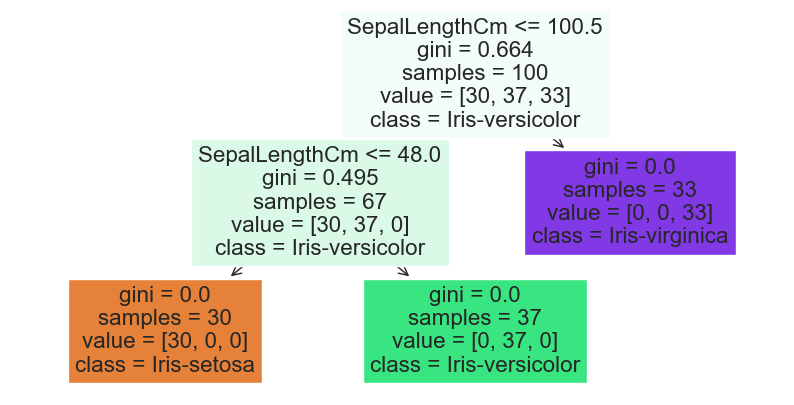

In [174]:
plt.figure(figsize=(10,5))
feature=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# tree=plot_tree(mod,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plot_tree(mod, filled = True,class_names=class_name,feature_names=feature)
plt.show()

#### Testing some different values except from dataset

In [186]:
Test_point = [[69.0,6.2,2.2,4.5],
             [23.5,42.8,8.6,6.5],
             [5.1,2.5,3.0,1.1],
             [87.0,6.7,3.1,4.7],
             [6.0,2.7,5.1,9.6],
             [96. ,5.7,3. ,4.2]]

print(mod.predict(Test_point))

[1 0 0 1 0 1]


### Summary
        The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.
